In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
Data = pd.read_excel("/content/drive/MyDrive/Dataset/Product Review/Product Review Sentiment Analysis.xlsx")

In [ ]:
Data.head()

,Reviews,Sentiments
0,লটির পো ) ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা...,Negative
1,এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে ...,Negative
2,অডার করছিলাম ৪ বা ৫ তারিখ হতে বাড়া পারে তার প...,Negative
3,হারামজাদা | বক্স ভিজা ছিল বাড়া `,Negative
4,বোতলের মুখ ভাংগা ছিল পুরাই ফালতু _ হারামজাদা -,Negative


In [ ]:
Data.shape

(3572, 2)

In [ ]:
Data['Sentiments'].unique()

array(['Negative ', 'Positive'], dtype=object)

<ipython-input-9-79b6d9e1af22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary


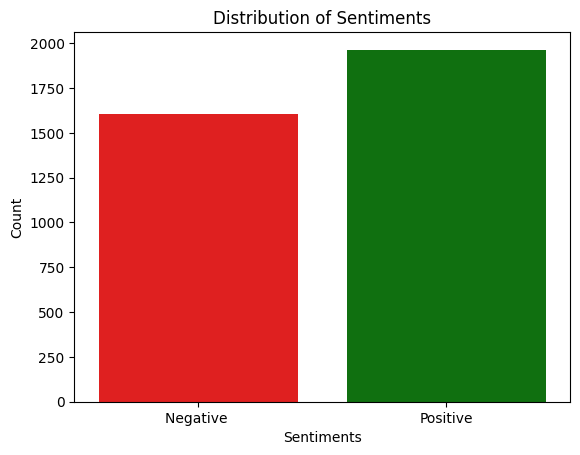

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
colors = {'negative': 'red', 'positive': 'green'}

# Plot the count of sentiments with specified palette
sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()


In [ ]:
import string
import re
# Function to preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

# Apply preprocessing to the 'Reviews' column
Data['Reviews'] = Data['Reviews'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else x)

# Display the updated DataFrame
print(Data)


                                                Reviews Sentiments
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  Negative 
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...  Negative 
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...  Negative 
3                          হারামজাদা বক্স ভিজা ছিল বাড়া  Negative 
4            বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা  Negative 
...                                                 ...        ...
3567  আলহামদুলিল্লাহ বীজ সঠিক সময়ে হাতে পেয়েছি ভালোই...   Positive
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ আমার ভা...   Positive
3569  ভালোই ছিলো প্যাকেজিং  টা ম্যাস্ক ছিলো সিল দেয়া...   Positive
3570                       খুব ভালো মানের মাক্স অসাধারণ   Positive
3571        চোখ বন্ধ করে কিনে ফালান অনেক ভালো খুবই ভালো   Positive

[3572 rows x 2 columns]


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (you only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')

# Provided list of Bangla stopwords
bangla_stopwords = [
    'এই', 'সে', 'এ', 'তার', 'যে', 'আমাদের', 'তাদের', 'আমরা', 'তোমরা',
    'তুমি', 'তারা', 'যার', 'কোন', 'কিছু', 'এক', 'অনেক', 'অধিক', 'সব',
    'কত', 'কোথায়'
]

# Function to remove stopwords from Bangla text
def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in bangla_stopwords]
    # Join the words back into a string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply stopword removal to the 'Reviews' column
Data['Cleaned_Reviews'] = Data['Reviews'].apply(remove_stopwords)

# Print the cleaned dataset
print(Data[['Reviews', 'Cleaned_Reviews']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Reviews  \
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...   
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...   
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...   
3                          হারামজাদা বক্স ভিজা ছিল বাড়া   
4            বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা   
...                                                 ...   
3567  আলহামদুলিল্লাহ বীজ সঠিক সময়ে হাতে পেয়েছি ভালোই...   
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ আমার ভা...   
3569  ভালোই ছিলো প্যাকেজিং  টা ম্যাস্ক ছিলো সিল দেয়া...   
3570                       খুব ভালো মানের মাক্স অসাধারণ   
3571        চোখ বন্ধ করে কিনে ফালান অনেক ভালো খুবই ভালো   

                                        Cleaned_Reviews  
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...  
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে পরে ক্যনছে...  
3                          হারামজাদা বক্স ভিজা ছিল বাড়া  
4

In [ ]:
import string
import pandas as pd
from nltk.tokenize import word_tokenize

text_column_name = 'Reviews'

# Function to tokenize text
def tokenize_text(text):
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    return tokens

# Apply the tokenize_text function to the desired column
Data['Tokenized_Reviews'] = Data['Reviews'].apply(lambda x: tokenize_text(x) if pd.notnull(x) else x)

# Display the updated DataFrame with tokenized reviews
print(Data[['Reviews', 'Tokenized_Reviews']])


                                                Reviews  \
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...   
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...   
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...   
3                          হারামজাদা বক্স ভিজা ছিল বাড়া   
4            বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা   
...                                                 ...   
3567  আলহামদুলিল্লাহ বীজ সঠিক সময়ে হাতে পেয়েছি ভালোই...   
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ আমার ভা...   
3569  ভালোই ছিলো প্যাকেজিং  টা ম্যাস্ক ছিলো সিল দেয়া...   
3570                       খুব ভালো মানের মাক্স অসাধারণ   
3571        চোখ বন্ধ করে কিনে ফালান অনেক ভালো খুবই ভালো   

                                      Tokenized_Reviews  
0     [লটির, পো, ভালোই, প্রথম, দিনেই, বেশ, বড়, সাইজে...  
1     [এদের, কাছ, থেকে, প্রডাক্ট, নেওয়ার, থেকে, বাড়া...  
2     [অডার, করছিলাম, বা, তারিখ, হতে, বাড়া, পারে, তা...  
3                    [হারামজাদা, বক্স, ভিজা, ছিল, বাড়া]  
4

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

tokenized_reviews = Data['Tokenized_Reviews'].dropna().tolist()
sentences = [text.split() for text in Data['Cleaned_Reviews']]
# Set up the Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4)

# Train the Word2Vec model
model.train(sentences, total_examples=len(tokenized_reviews), epochs=10)

# Save the trained Word2Vec model
model.save("word2vec_model")

# You can later load the model using:
# model = Word2Vec.load("word2vec_model")

# Accessing the vector representation of a word
vector_representation = model.wv['হারামজাদা']
print("Vector representation of 'হারামজাদা':", vector_representation)

Vector representation of 'হারামজাদা': [-0.23099582 -0.11906783  0.11310074 -0.44774356  0.37518993 -0.3832625
  0.18941839  0.50282353 -0.05152494 -0.18356396 -0.14049003 -0.557369
 -0.25679496  0.11249284  0.21612212 -0.11821698 -0.1381452  -0.42481086
  0.1705098  -0.57551646  0.04687592  0.19090131  0.1937356  -0.17338635
 -0.4164793   0.145739    0.01872473 -0.4855738  -0.20885567  0.03258311
  0.13912307  0.20483209  0.03546245  0.02522171 -0.17507178  0.6309377
 -0.20773606 -0.5900084  -0.34501255 -0.35687715  0.12729056 -0.09087293
  0.0511599  -0.07855451 -0.00903515 -0.16045646 -0.27935055 -0.16218185
  0.293585    0.07740022  0.36284173 -0.17305791  0.2340704   0.02251259
 -0.03235829  0.2406724   0.27016297  0.45188686 -0.24259715 -0.08737908
 -0.20684423  0.18437323 -0.11826403  0.17315575 -0.58680725  0.11698252
  0.06507082  0.00704988 -0.46642822  0.5341646  -0.14962518  0.08563193
  0.16998415 -0.21223503  0.44125447 -0.12683353  0.05079084 -0.05495011
 -0.494301    0.2

In [ ]:
def get_sentence_embedding(sentence, model, vector_size):
    vectors = np.zeros((len(sentence), vector_size))
    for i, word in enumerate(sentence):
        if word in model.wv.key_to_index:
            vectors[i] = model.wv[word]
    if vectors.shape[0] > 0:
        average_embedding = np.mean(vectors, axis=0)
    else:
        average_embedding = np.zeros(vector_size)
    return average_embedding

vector_size = 100
Data['word2vec_embedding'] = [get_sentence_embedding(sentence, model, vector_size) for sentence in sentences]

In [ ]:
Data.head()

,Reviews,Sentiments,Cleaned_Reviews,Tokenized_Reviews,word2vec_embedding
0,লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...,Negative,লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...,"[লটির, পো, ভালোই, প্রথম, দিনেই, বেশ, বড়, সাইজে...","[-0.08161724121733145, 0.02078338492323052, 0...."
1,এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...,Negative,এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...,"[এদের, কাছ, থেকে, প্রডাক্ট, নেওয়ার, থেকে, বাড়া...","[-0.14562519513336675, -0.04268932022698989, 0..."
2,অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...,Negative,অডার করছিলাম বা তারিখ হতে বাড়া পারে পরে ক্যনছে...,"[অডার, করছিলাম, বা, তারিখ, হতে, বাড়া, পারে, তা...","[-0.3217089559350695, -0.306032030887547, 0.01..."
3,হারামজাদা বক্স ভিজা ছিল বাড়া,Negative,হারামজাদা বক্স ভিজা ছিল বাড়া,"[হারামজাদা, বক্স, ভিজা, ছিল, বাড়া]","[-0.1245511669665575, -0.037575600668787956, 0..."
4,বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা,Negative,বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা,"[বোতলের, মুখ, ভাংগা, ছিল, পুরাই, ফালতু, হারামজ...","[-0.12657262172017777, -0.061392387242189476, ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = Data['Sentiments']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X = ['word2vec_embedding']
X = np.array(Data['word2vec_embedding'].tolist())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train[0]

array([-0.1348908 ,  0.0158288 ,  0.07609629, -0.32607137,  0.14654369,
       -0.33962035,  0.10773192,  0.49482866, -0.09286952, -0.26507617,
       -0.17043189, -0.40857549, -0.22678793, -0.01295965,  0.10115231,
       -0.08068012, -0.0246019 , -0.3355025 ,  0.20613211, -0.32245616,
        0.10492751, -0.02124345,  0.1402851 , -0.14157508, -0.3638042 ,
        0.20362651, -0.11365441, -0.42489387, -0.24649156,  0.08765919,
        0.08508393,  0.09821381, -0.05950145, -0.03947535, -0.12730376,
        0.41697735, -0.20856345, -0.29851009, -0.27149602, -0.2832133 ,
        0.04559473, -0.06539004,  0.0996364 , -0.02396676,  0.01355917,
       -0.1798421 , -0.17590134, -0.2202187 ,  0.26163295,  0.0136807 ,
        0.20458655, -0.15388323,  0.19526762, -0.07832487,  0.08457788,
        0.0084028 ,  0.17721432,  0.27270659, -0.21660202,  0.04445399,
       -0.2073884 ,  0.08258836, -0.06411248,  0.17442787, -0.42665447,
        0.19320461,  0.085058  , -0.07873625, -0.32058427,  0.23

In [ ]:
y_train[0]

0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

num_epochs = 20
batch_size = 64
embedding_dim = 128
cnn_optimizer = Adam(learning_rate=0.000001)

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=100))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)

Epoch 1/20
45/45 [==============================] - 3s 18ms/step - loss: 0.6850 - accuracy: 0.5628 - val_loss: 0.6730 - val_accuracy: 0.5664
Epoch 2/20
45/45 [==============================] - 0s 9ms/step - loss: 0.6383 - accuracy: 0.5898 - val_loss: 0.6200 - val_accuracy: 0.5720
Epoch 3/20
45/45 [==============================] - 0s 9ms/step - loss: 0.6134 - accuracy: 0.6055 - val_loss: 0.6148 - val_accuracy: 0.5790
Epoch 4/20
45/45 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6010 - val_loss: 0.6086 - val_accuracy: 0.5790
Epoch 5/20
45/45 [==============================] - 0s 9ms/step - loss: 0.6109 - accuracy: 0.5982 - val_loss: 0.6136 - val_accuracy: 0.5790
Epoch 6/20
45/45 [==============================] - 0s 7ms/step - loss: 0.6103 - accuracy: 0.6059 - val_loss: 0.6149 - val_accuracy: 0.5790
Epoch 7/20
45/45 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.6097 - val_loss: 0.6072 - val_accuracy: 0.5790
Epoch 8/20
45/45 [=